In [4]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

#import emission.core.get_database as edb
from plots import *
#import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

import plots
import importlib
importlib.reload(plots)

<module 'plots' from '/usr/src/app/saved-notebooks/plots.py'>

In [5]:
# data=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips.csv")

In [ ]:
print(len(data))

In [ ]:
#filtering out at_work
data=data[data['purpose_confirm']!='at_work']
print(len(data))

In [3]:
minipilot_mode_labels = ['Car',
                   'Shared Car',
                   'Walk',
                   'Transit',
                   'Ridehail',
                   'Other',
                   'E-bike']
minipilot_all_data = [.293,
                     .209,
                     .075,
                     .054,
                     .029,
                     .029,
                     .313]
minipilot_commute_data = [.270,
                         .294,
                         .050,
                         .0,
                         .0,
                         .062,
                         .324]
colnames = ['Mode_confirm','All Trips','Commute Trips']
minipilot_mode_data_1 = pd.DataFrame(list(zip(minipilot_mode_labels, minipilot_all_data)))
minipilot_mode_data_2 = pd.DataFrame(list(zip(minipilot_mode_labels, minipilot_commute_data)))
minipilot_mode_data_1['Trip Type'] = 'All Trips'
minipilot_mode_data_2['Trip Type'] = 'Work Trips'
minipilot_mode_data = pd.concat([minipilot_mode_data_1, minipilot_mode_data_2])
minipilot_mode_data['Dataset'] = 'Minipilot'
minipilot_mode_data.columns = ['Mode','Proportion','Trip Type','Dataset']

minipilot_purp_labels = ['Home',
                   'Work',
                   'Pick-up/Drop off',
                   'Shopping',
                   'Recreation/Exercise',
                   'Meal',
                   'Entertainment/Social',
                   'Transit transfer',
                   'Other',
                   'Personal/Medical']
minipilot_all_data = [.171,
                     .163,
                     .138,
                     .120,
                     .058,
                     .055,
                     .045,
                     .022,
                     .051,
                     .176]
minipilot_commute_data = [.162,
                         .166,
                         .190,
                         .097,
                         .086,
                         .082,
                         .061,
                          0,
                         .052,
                         .104]
colnames = ['Trip_purpose','All Trips','E-Bike Trips']
minipilot_purp_data_1 = pd.DataFrame(list(zip(minipilot_purp_labels, minipilot_all_data)))
minipilot_purp_data_2 = pd.DataFrame(list(zip(minipilot_purp_labels, minipilot_commute_data)))
minipilot_purp_data_1['Trip Type'] = 'All Trips'
minipilot_purp_data_2['Trip Type'] = 'E-Bike Trips'
minipilot_purp_data = pd.concat([minipilot_purp_data_1, minipilot_purp_data_2])
minipilot_purp_data['Dataset'] = 'Minipilot'
minipilot_purp_data.columns = ['Purpose','Proportion','Trip Type','Dataset']

In [8]:
plot_data = data.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'Work Trips'

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Mode','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_mode_data])

In [12]:
plot_data

,Mode,Trip Type,Proportion,Dataset
0,Car,All Trips,0.256326,Long Term
1,E-bike,All Trips,0.282100,Long Term
2,Other,All Trips,0.034588,Long Term
3,Ridehail,All Trips,0.005269,Long Term
4,Shared Car,All Trips,0.238715,Long Term
5,Transit,All Trips,0.022701,Long Term
6,Walk,All Trips,0.160303,Long Term
0,Car,Work Trips,0.282939,Long Term
1,E-bike,Work Trips,0.448652,Long Term
2,Other,Work Trips,0.025523,Long Term


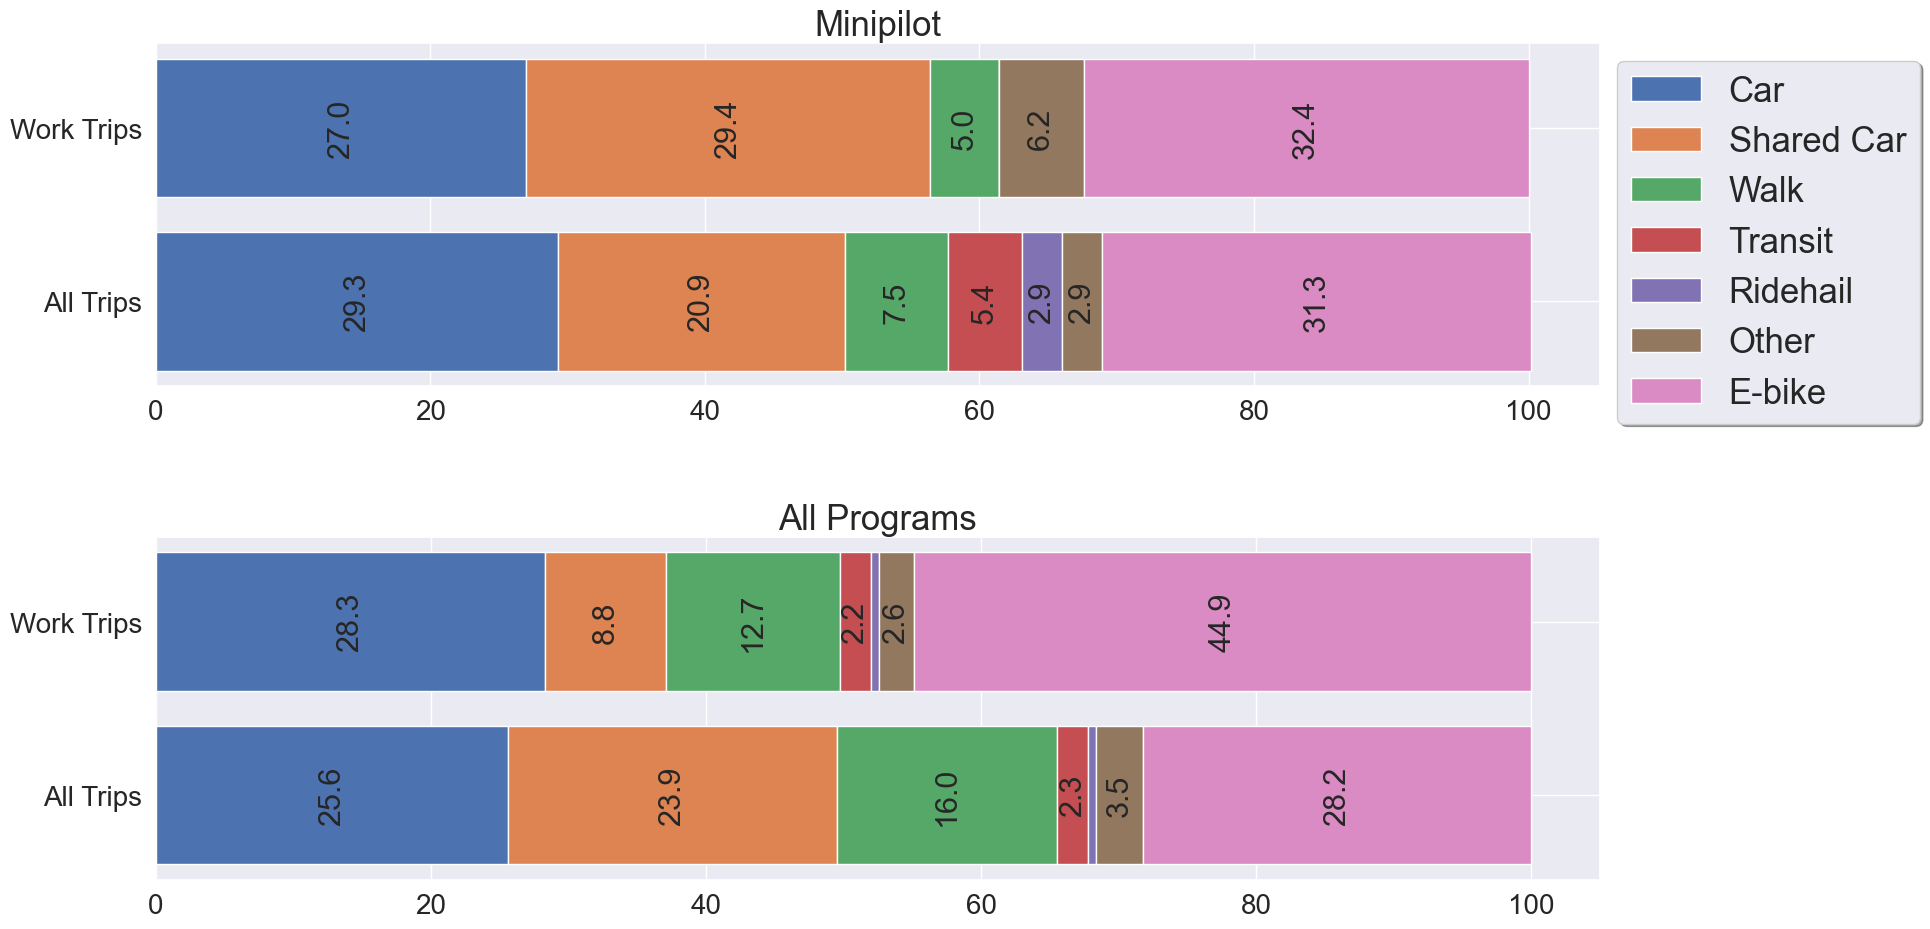

In [138]:
width = 0.8
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.rcParams.update({'font.size': 30}) 
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for mode in pd.unique(fig_data_mini.Mode):
    mini = fig_data_mini[fig_data_mini['Mode']==mode]
    long = fig_data_long[fig_data_long['Mode']==mode]
    
    labels = mini['Trip Type']
    vals = mini['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax[0].barh(labels, vals, width, left=running_total_mini, label=mode)
    ax[0].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax[1].barh(labels, vals, width, left=running_total_long, label=mode)
    ax[1].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax[0].set_title('Minipilot', fontsize=25)
ax[1].set_title('All Programs', fontsize=25)
ax[0].legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=25)
plt.subplots_adjust(bottom=0.20)
fig.tight_layout()
plt.show()

In [5]:
data['Program'] = data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

In [ ]:
#separating programs
four_corners = data[data.Program == "Four Corners (Durango)"]
community_cycles = data[data.Program == "Community Cycles (Boulder)"]
fort_collins = data[data.Program == "Fort Collins"]
pueblo = data[data.Program == "Pueblo County"]
smart_commute = data[data.Program == "Smart Commute (Northridge)"]
vail = data[data.Program == "Vail"]

In [ ]:
print(len(smart_commute))

In [174]:
plot_data = data.copy()
plot_data.loc[plot_data['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
plot_data.loc[plot_data['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'
t1 = plot_data.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'
t1.loc[len(t1.index)] = ['Pick-up/Drop off', 'All Trips', 0]

t2 = plot_data[plot_data['Mode_confirm']=='E-bike'].copy()
t2 = t2.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'E-Bike Trips'
t2.loc[len(t2.index)] = ['Pick-up/Drop off', 'E-Bike Trips', 0]

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Purpose','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_purp_data])

In [175]:
plot_data

,Purpose,Trip Type,Proportion,Dataset
0,Entertainment/Social,All Trips,0.066736,Long Term
1,Home,All Trips,0.215234,Long Term
2,Meal,All Trips,0.057337,Long Term
3,Other,All Trips,0.223722,Long Term
4,Personal/Medical,All Trips,0.030002,Long Term
5,Recreation/Exercise,All Trips,0.086103,Long Term
6,Shopping,All Trips,0.097388,Long Term
7,Transit transfer,All Trips,0.007496,Long Term
8,Work,All Trips,0.215982,Long Term
9,Pick-up/Drop off,All Trips,0.000000,Long Term


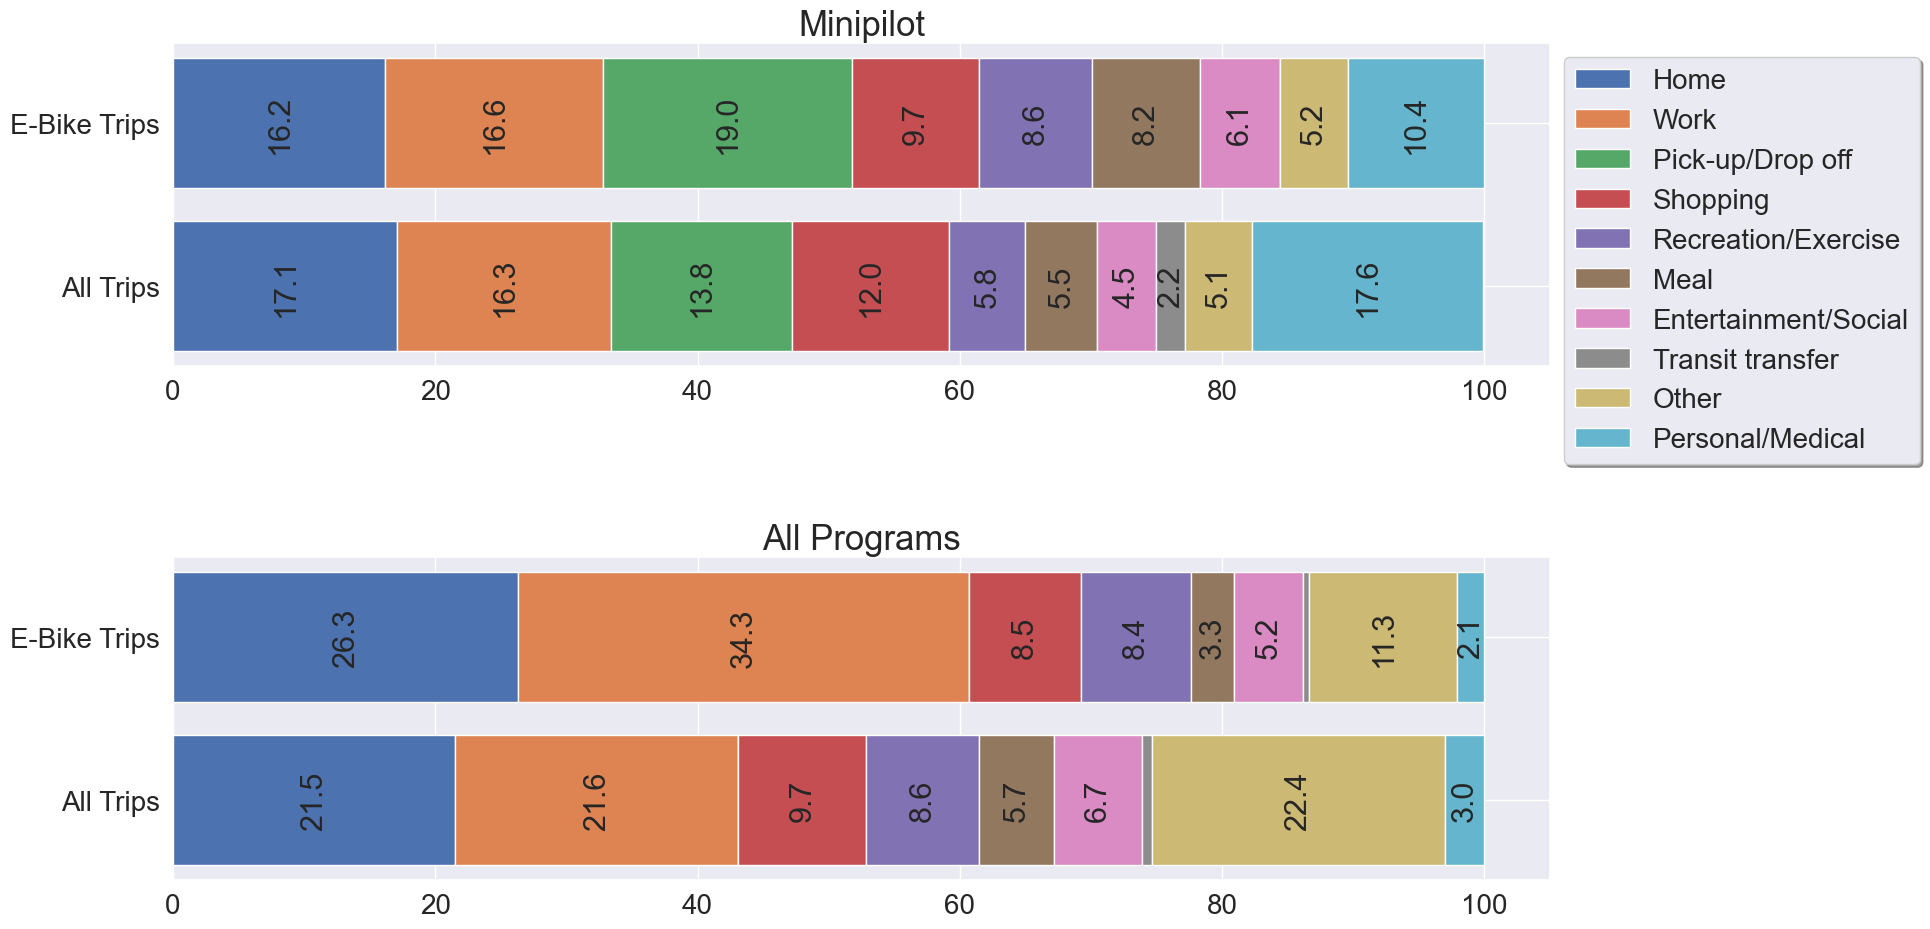

In [177]:
width = 0.8
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.rcParams.update({'font.size': 30}) 
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for purp in pd.unique(fig_data_mini.Purpose):
    mini = fig_data_mini[fig_data_mini['Purpose']==purp]
    long = fig_data_long[fig_data_long['Purpose']==purp]
    
    labels = mini['Trip Type']
    vals = mini['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax[0].barh(labels, vals, width, left=running_total_mini, label=purp)
    ax[0].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax[1].barh(labels, vals, width, left=running_total_long, label=purp)
    ax[1].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax[0].set_title('Minipilot', fontsize=25)
ax[1].set_title('All Programs', fontsize=25)
ax[0].legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)
plt.subplots_adjust(bottom=0.20)
fig.tight_layout()
plt.show()

In [6]:
data = pd.read_csv('filtered_merged_trips.csv')

data['occupation_cat'] = data['Which best describes your primary job?'].replace(['Sales or service',
                                                                                 'Manufacturing, construction, maintenance, or farming',                                                                            
                                                                                 'Janitorial',
                                                                                 'Professional, managerial, or technical',
                                                                                 'Clerical or administrative support',
                                                                                 'Teacher',
                                                                                 'Medical',
                                                                                 'CNA',
                                                                                 'Restaurant manager',
                                                                                 'Co op laundry',
                                                                                 'Cook',
                                                                                 'Nurse',
                                                                                 'Dining Services',
                                                                                 'Security',
                                                                                 'Food service',
                                                                                 'Csu custodian',
                                                                                 'Residential Dining Services',
                                                                                 'education/early childhood',
                                                                                 'Inbound cs',
                                                                                 'Custodial Maintanace',
                                                                                 'Amazon',
                                                                                 'Custodian',
                                                                                 'Hockey rink',
                                                                                 'Pastry chef and line cook',                                                                                 
                                                                                 'Cooking',
                                                                                 'Education non-profit manager',
                                                                                 'Healthcare',
                                                                                 'Chef',
                                                                                 'Accounting Technician',
                                                                                 'Caregiver/ Qmap',
                                                                                 'Caregiver',
                                                                                 'Health care',
                                                                                 'Medical field'],
                                                                                ['Sales or Service',
                                                                                 'Manufacturing, Construction, Maintenance, or Farming',
                                                                                 'Custodial',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Clerical or Administrative Support',
                                                                                 'Education',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Medical/Healthcare',
                                                                                 'Sales or Service',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Sales or Service',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Education',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Education',
                                                                                 'Medical/Healthcare',
                                                                                 'Sales or Service',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare'])


/tmp/ipykernel_64/820383269.py:1: DtypeWarning: Columns (66,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('filtered_merged_trips.csv')


In [7]:
data['occupation_cat'].unique()

array(['Sales or Service', 'Food Service', 'Cooking ',
       'Medical/Healthcare', 'Clerical or Administrative Support',
       'Accounting Technician ',
       'Manufacturing, Construction, Maintenance, or Farming',
       'Professional, Managerial, or Technical', 'Education',
       'Education ', 'Csu custodian ', 'Custodial ', 'Custodial', nan,
       'Maintenance ', 'Maintenance', 'Janitorial ', 'Amazon ',
       'Custodial Maintanace ', 'Hockey rink '], dtype=object)

In [8]:
data['occupation_cat']= data['occupation_cat'].replace(['Food Service', 'Cooking ', 'Accounting Technician ','Education ',
                                                       'Csu custodian ','Custodial ','Maintenance ','Maintenance','Janitorial ',
                                                       'Amazon ', 'Custodial Maintanace ', 'Hockey rink '],
                                                      ['Sales or Service' , 'Sales or Service', 'Professional, Managerial, or Technical',
                                                      'Education', 'Custodial', 'Custodial', 'Custodial', 'Custodial', 'Custodial',
                                                      'Sales or Service','Custodial' ,'Sales or Service'])

data['occupation_cat'] = data['occupation_cat'].replace(['Manufacturing, Construction, Maintenance, or Farming', 'Professional, Managerial, or Technical', 'Clerical or Administrative Support'],
                                                        ['Manufacturing, Construction,\nMaintenance, or Farming', 'Professional, Managerial,\nor Technical', 'Clerical or\nAdministrative Support'])


In [9]:
data['occupation_cat'].unique()

array(['Sales or Service', 'Medical/Healthcare',
       'Clerical or\nAdministrative Support',
       'Professional, Managerial,\nor Technical',
       'Manufacturing, Construction,\nMaintenance, or Farming',
       'Education', 'Custodial', nan], dtype=object)

In [10]:
# proportion of trips by occupation
plot_data = plot_data_1.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['occupation_cat','user_id'], as_index=False).nth(0)[['occupation_cat','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

plot_title = 'E-bike Use (Trips) by Occupation Categories'
ylab='Occupation Category'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data= plot_data, x='proportion' , y='occupation_cat', estimator=np.mean).set(title=plot_title,xlabel='Proportion of Total Trips',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.savefig("CanBikeCO_report_occ_ebike_trips.jpeg", bbox_inches='tight')

NameError: name 'plot_data_1' is not defined

In [13]:
data['induced']=np.where(data['Replaced_mode']=='No Travel', 'Induced', 'Non-induced')

In [28]:
data['Program'] = data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])

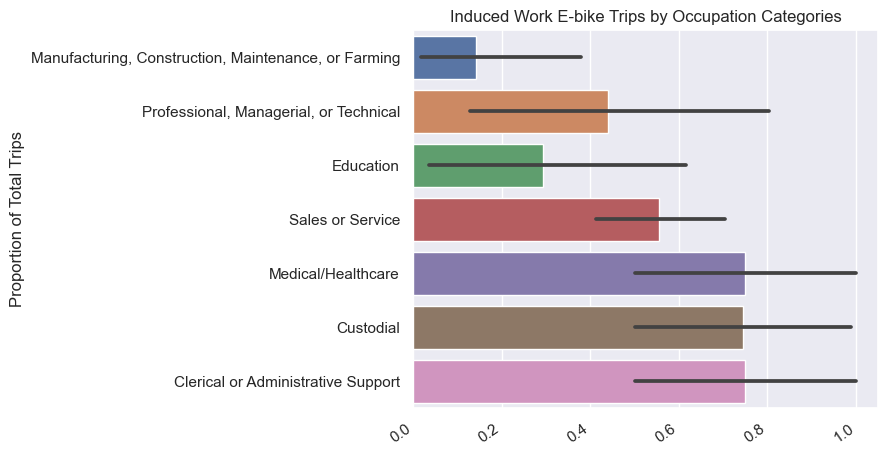

In [34]:
# proportion of induced trips by occupation
plot_data = data.copy()
plot_data = plot_data[(plot_data['induced']=='Induced') & (plot_data['Trip_purpose']=='Work')]

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['occupation_cat','user_id'], as_index=False).nth(0)[['occupation_cat','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

plot_title = 'Induced Work E-bike Trips by Occupation Categories'
ylab='Proportion of Total Trips'
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(data= plot_data, x='proportion' , y='occupation_cat', estimator=np.mean).set(title=plot_title,xlabel='',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)

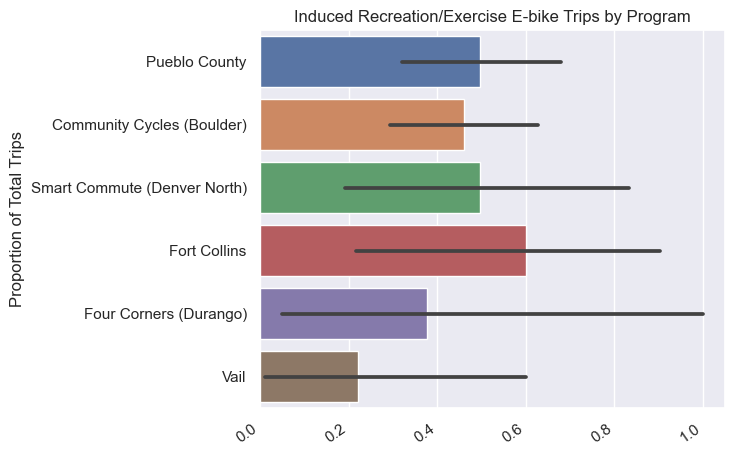

In [33]:
# proportion of induced trips by occupation
plot_data = data.copy()
plot_data = plot_data[(plot_data['induced']=='Induced') & (plot_data['Trip_purpose']=='Recreation/Exercise')]

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['Program','user_id'], as_index=False).nth(0)[['Program','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

plot_title = 'Induced Recreation/Exercise E-bike Trips by Program'
ylab='Proportion of Total Trips'
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(data= plot_data, x='proportion' , y='Program', estimator=np.mean).set(title=plot_title,xlabel='',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)

[Text(0, 30, '0.41'),
 Text(0, 30, '0.28'),
 Text(0, 30, '0.18'),
 Text(0, 30, '0.14'),
 Text(0, 30, '0.14'),
 Text(0, 30, '0.14'),
 Text(0, 30, '0.13'),
 Text(0, 30, '0.10'),
 Text(0, 30, '0.08'),
 Text(0, 30, '0.03')]

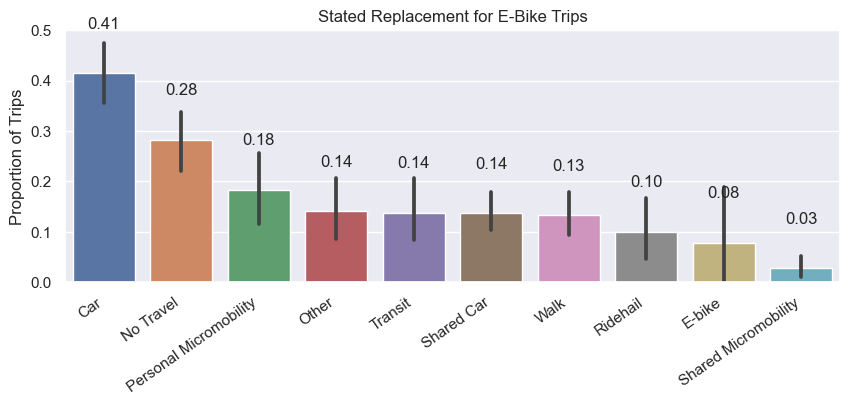

In [5]:
# Substitution rate of ebike trips
plot_data = data.copy()
t1 = plot_data.groupby(['user_id','Replaced_mode'], as_index=False).count()[['user_id','Replaced_mode','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)

data_order = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode
labels = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode

plot_title='Stated Replacement for E-Bike Trips'
ylab='Proportion of Trips'
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', estimator=np.mean, order=data_order).set(title=plot_title,xlabel='',ylabel=ylab,ylim=(0,.5))
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=30)

[Text(0, 10, '0.34'),
 Text(0, 10, '0.22'),
 Text(0, 10, '0.11'),
 Text(0, 10, '0.10'),
 Text(0, 10, '0.09'),
 Text(0, 10, '0.08'),
 Text(0, 10, '0.03'),
 Text(0, 10, '0.02'),
 Text(0, 10, '0.00'),
 Text(0, 10, '0.00')]

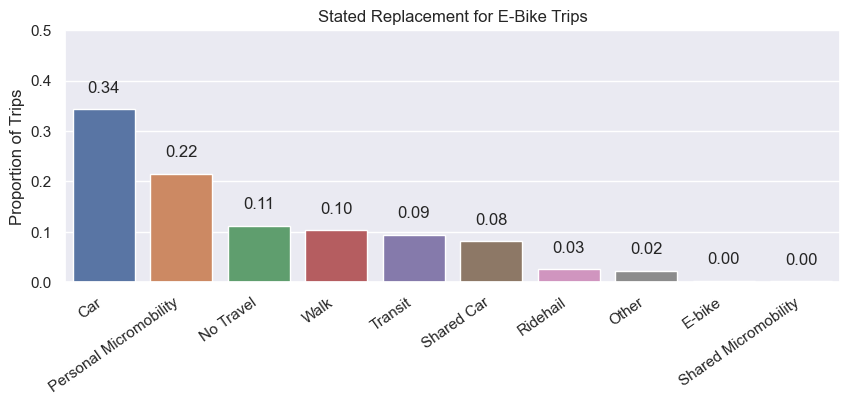

In [28]:
# Substitution rate of ebike trips
plot_data = data.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
t1 = plot_data.groupby(['Mode_confirm','Replaced_mode'], as_index=False).count()[['Mode_confirm','Replaced_mode','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
plot_data = t1.merge(t2, on='Mode_confirm')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)

data_order = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode
labels = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode

plot_title='Stated Replacement for E-Bike Trips'
ylab='Proportion of Trips'

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', estimator=np.mean, order=data_order).set(title=plot_title,xlabel='',ylabel=ylab,ylim=(0,.5))
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=10)

[Text(0, 35, '0.62'),
 Text(0, 35, '0.34'),
 Text(0, 35, '0.33'),
 Text(0, 35, '0.22'),
 Text(0, 35, '0.21'),
 Text(0, 35, '0.16'),
 Text(0, 35, '0.16'),
 Text(0, 35, '0.14'),
 Text(0, 35, '0.07')]

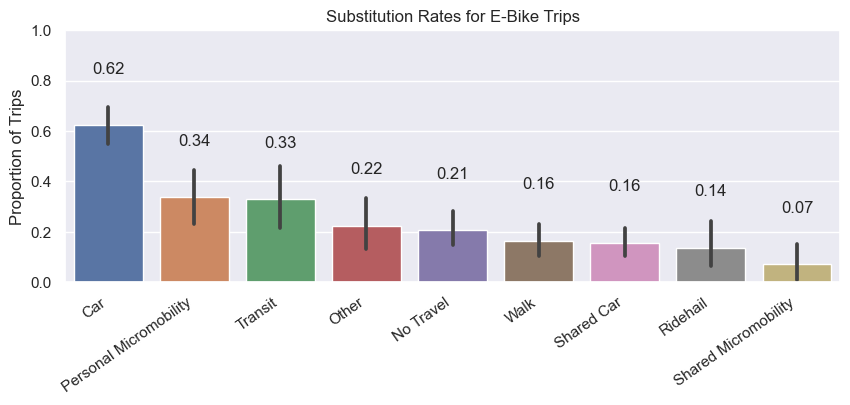

In [33]:
# Substitution rate of ebike trips
plot_data = data.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data[plot_data['Replaced_mode']!='E-bike']
t1 = plot_data.groupby(['user_id','Replaced_mode'], as_index=False).count()[['user_id','Replaced_mode','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)

data_order = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode
labels = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode

plot_title='Substitution Rates for E-Bike Trips'
ylab='Proportion of Trips'
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', estimator=np.mean, order=data_order).set(title=plot_title,xlabel='',ylabel=ylab,ylim=(0,1))
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=35)

In [15]:
t1

,user_id,Replaced_mode,distance_miles
0,0154d714-3928-4c34-b865-e5a417cd48af,Car,6
1,03a395b4-d861-4757-bb84-32b4984559b0,Car,235
2,03a395b4-d861-4757-bb84-32b4984559b0,Shared Car,2
3,03a395b4-d861-4757-bb84-32b4984559b0,Transit,1
4,0b3e78fa-91d8-4aa6-a320-3440143c8c16,Car,1
...,...,...,...
404,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Personal Micromobility,1
405,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Ridehail,5
406,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Shared Car,6
407,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Transit,1


In [ ]:
#separating programs
four_corners = data[data.Program == "Four Corners (Durango)"]
community_cycles = data[data.Program == "Community Cycles (Boulder)"]
fort_collins = data[data.Program == "Fort Collins"]
pueblo = data[data.Program == "Pueblo County"]
smart_commute = data[data.Program == "Smart Commute (Northridge)"]
vail = data[data.Program == "Vail"]

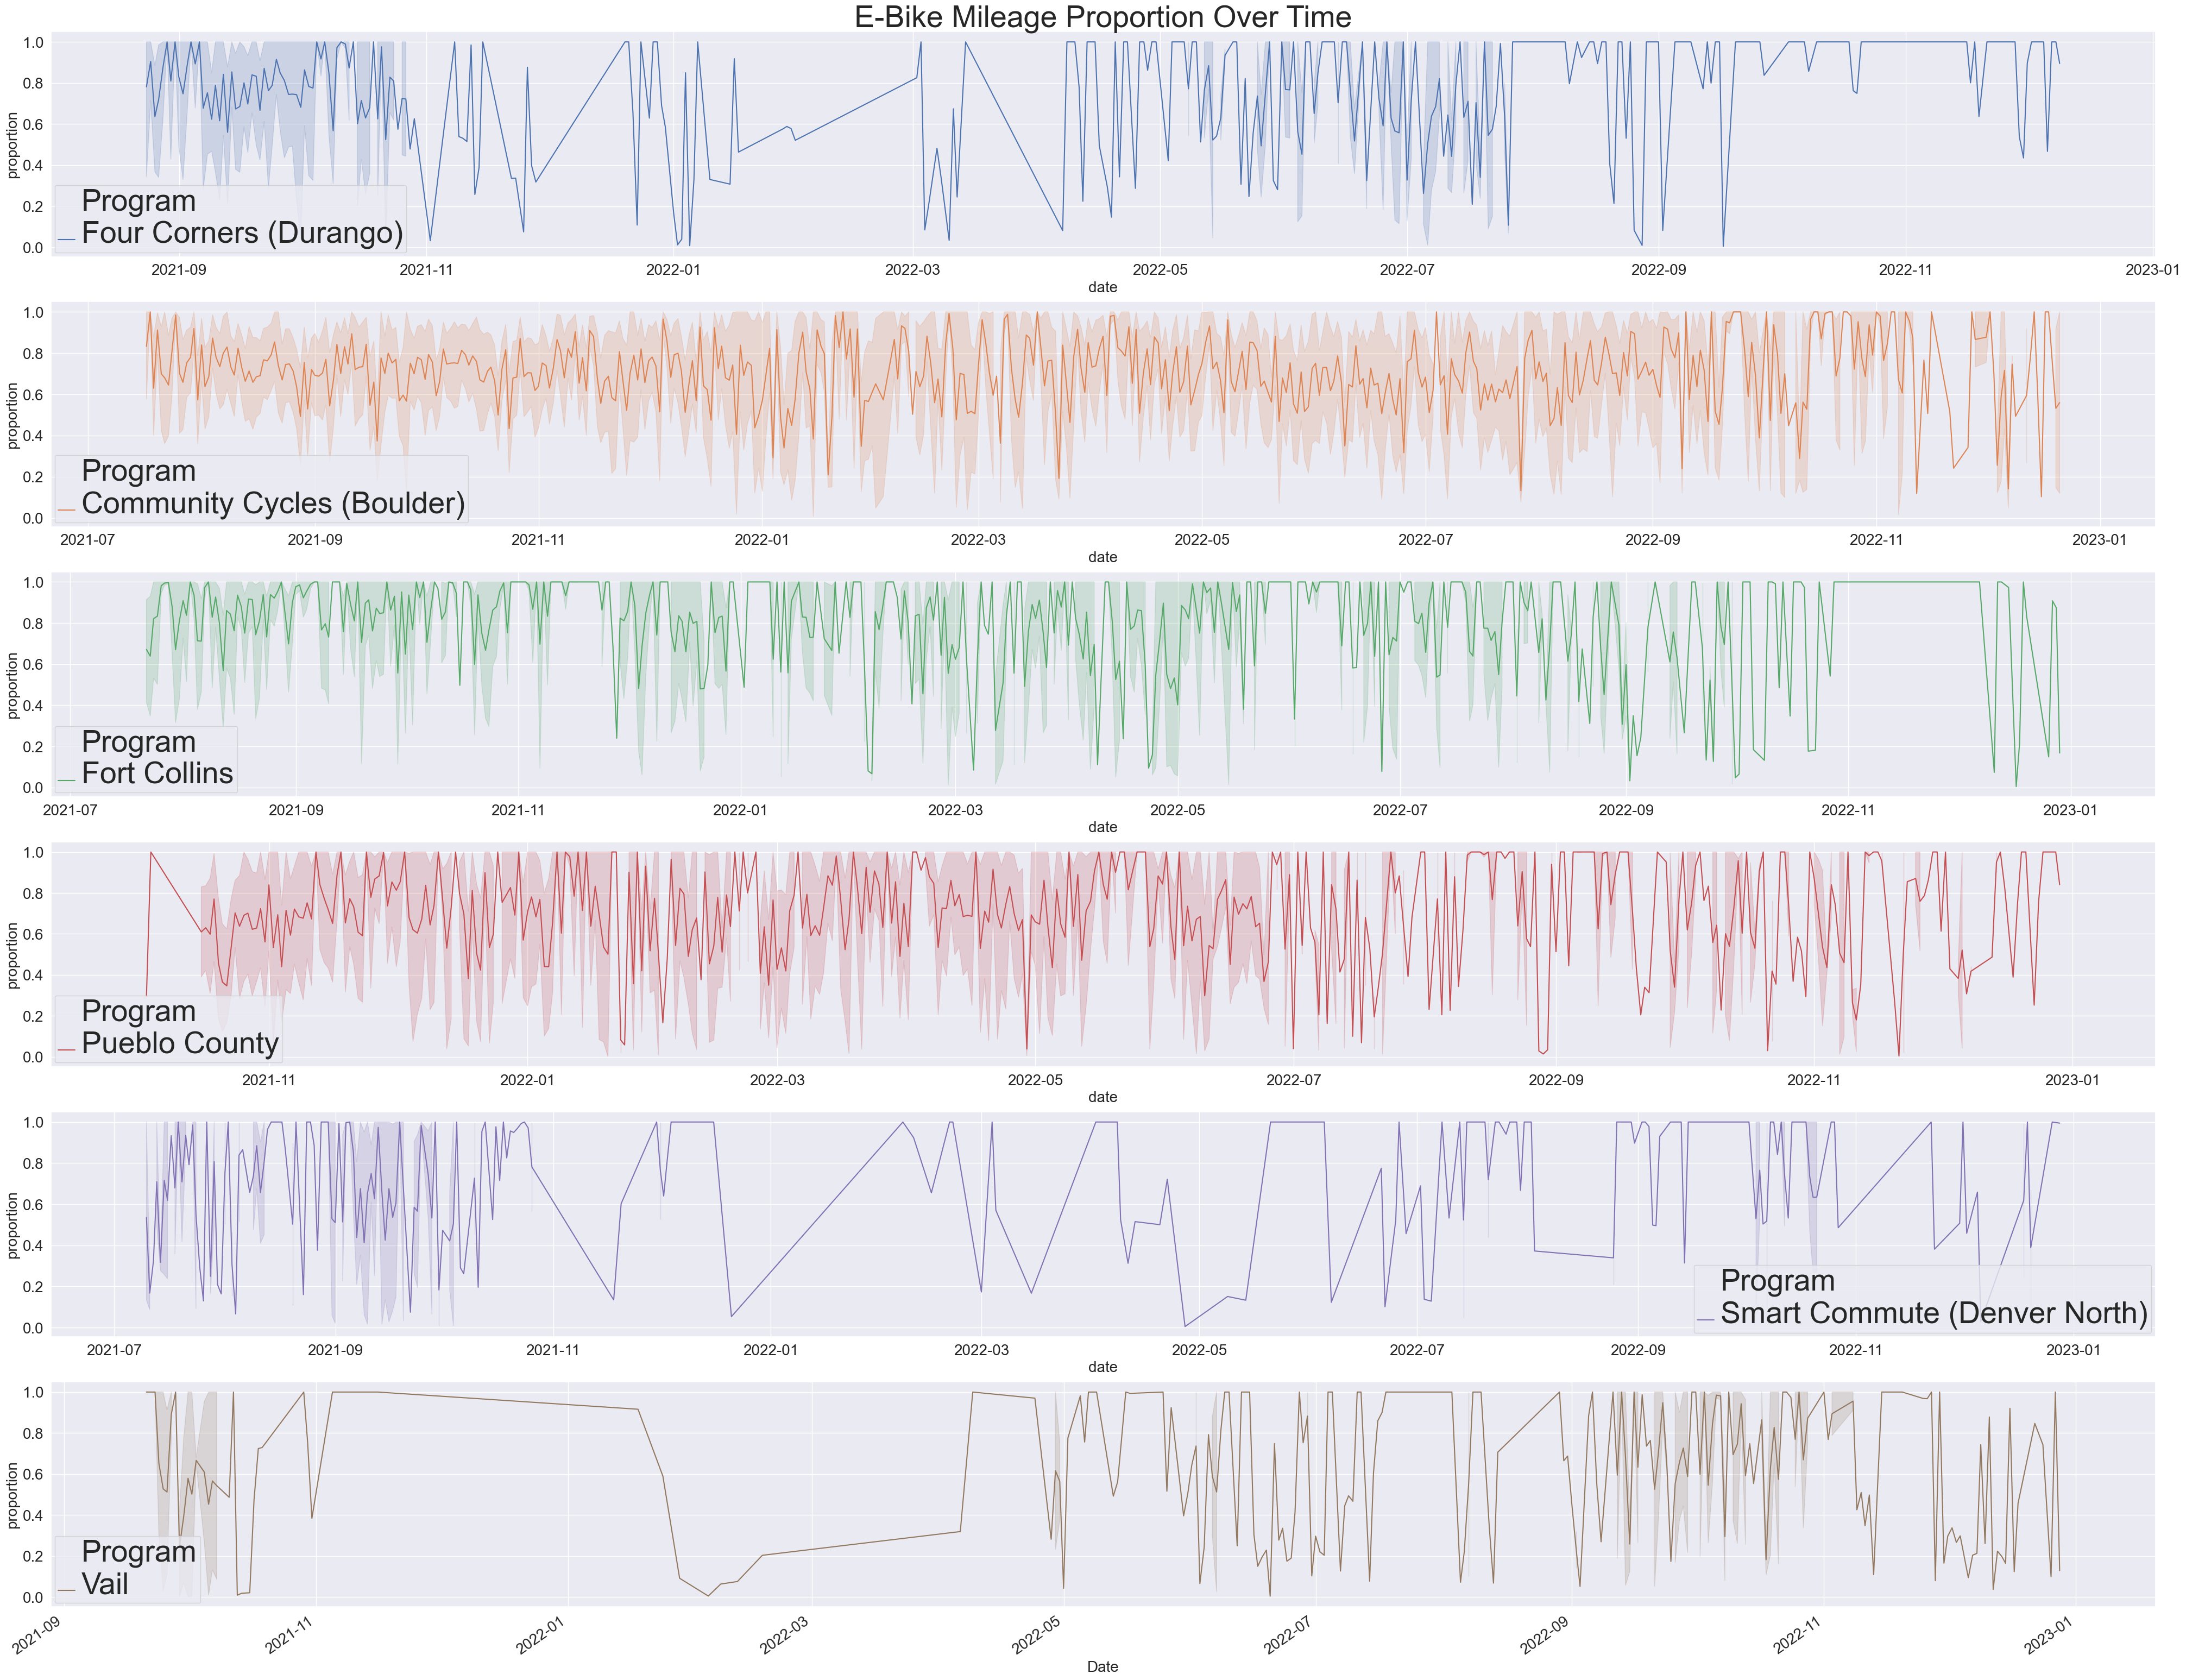

In [272]:
# How ebike mileage changes over time
from datetime import datetime
plot_data = data.copy()
plot_data ['date'] = pd.to_datetime(plot_data['date_time'])
plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])
t1 = plot_data.groupby(['user_id','date','Mode_confirm'], as_index=False).sum()[['user_id','date','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id','Program','date'], as_index=False).sum()[['user_id','Program','date','distance_miles']]
plot_data = t1.merge(t2, on=['user_id','date'])
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data[plot_data['distance_miles_y'].notnull()]

plot_title = 'E-Bike Mileage Proportion Over Time'
fig, ax = plt.subplots(6,1, figsize=(50,50))
sns.lineplot(data=plot_data[plot_data.Program == "Four Corners (Durango)"], x='date', y='proportion',color="red", hue='Program', estimator=np.mean, ax=ax[0])
ax[0].set_title(plot_title, fontsize=40)
sns.lineplot(data=plot_data[plot_data.Program == "Community Cycles (Boulder)"], x='date', y='proportion', color="blue",hue='Program',estimator=np.mean, ax=ax[1], palette=["C1"])
sns.lineplot(data=plot_data[plot_data.Program == "Fort Collins"], x='date', y='proportion', color="green",hue='Program',estimator=np.mean, ax=ax[2], palette=["C2"])
sns.lineplot(data=plot_data[plot_data.Program == "Pueblo County"], x='date', y='proportion',color="cyan",hue='Program', estimator=np.mean, ax=ax[3], palette=["C3"])
sns.lineplot(data=plot_data[plot_data.Program == "Smart Commute (Denver North)"], x='date', y='proportion',color="purple",hue='Program', estimator=np.mean, ax=ax[4], palette=["C4"])
sns.lineplot(data=plot_data[plot_data.Program == "Vail"], x='date', y='proportion', color="orange",hue='Program',estimator=np.mean, ax=ax[5], palette=["C5"])
ax[5].set(xlabel='Date')
plt.setp(ax[0].get_legend().get_texts(), fontsize='40')
plt.setp(ax[1].get_legend().get_texts(), fontsize='40')
plt.setp(ax[2].get_legend().get_texts(), fontsize='40')
plt.setp(ax[3].get_legend().get_texts(), fontsize='40')
plt.setp(ax[4].get_legend().get_texts(), fontsize='40')
plt.setp(ax[5].get_legend().get_texts(), fontsize='40')
plt.xticks(rotation=35, ha='right', fontsize=20)
plt.subplots_adjust(bottom=0.30)
fig.savefig(r'C:\Users\dakcicek\Documents\GitHub\ceo_analysis\viz_scripts\plots\to.png', bbox_inches='tight')

In [180]:
plot_data

,user_id,date_time,Mode_confirm,distance_miles_x,program,distance_miles_y,proportion
49,0154d714-3928-4c34-b865-e5a417cd48af,1.649980e+18,E-bike,5.774909,pc,29.777812,0.193933
54,0154d714-3928-4c34-b865-e5a417cd48af,1.650240e+18,E-bike,6.407788,pc,30.682636,0.208841
56,03a395b4-d861-4757-bb84-32b4984559b0,1.629240e+18,E-bike,1.026137,cc,1.026137,1.000000
57,03a395b4-d861-4757-bb84-32b4984559b0,1.629330e+18,E-bike,2.747352,cc,2.747352,1.000000
58,03a395b4-d861-4757-bb84-32b4984559b0,1.629590e+18,E-bike,1.118067,cc,1.118067,1.000000
...,...,...,...,...,...,...,...
24391,feb1d940-cd36-47d1-a101-580c2a3b3f8c,1.637370e+18,E-bike,25.123981,cc,25.123981,1.000000
24392,feb1d940-cd36-47d1-a101-580c2a3b3f8c,1.637970e+18,E-bike,5.838212,cc,5.838212,1.000000
24393,feb1d940-cd36-47d1-a101-580c2a3b3f8c,1.648860e+18,E-bike,37.534311,cc,37.534311,1.000000
24394,feb1d940-cd36-47d1-a101-580c2a3b3f8c,1.650070e+18,E-bike,19.411646,cc,19.411646,1.000000


In [6]:
#separating programs
four_corners = data[data.Program == "Four Corners (Durango)"]
community_cycles = data[data.Program == "Community Cycles (Boulder)"]
fort_collins = data[data.Program == "Fort Collins"]
pueblo = data[data.Program == "Pueblo County"]
smart_commute = data[data.Program == "Smart Commute (Northridge)"]
vail = data[data.Program == "Vail"]

In [71]:
plot_data = vail.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'Work Trips'
t2.loc[len(t2.index)] = ['Ridehail', 'Work Trips', 0]
#t2.loc[len(t2.index)] = ['Transit', 'Work Trips', 0] 
#t2.loc[len(t2.index)] = ['Other', 'Work Trips', 0]

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Mode','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_mode_data])

In [72]:
plot_data

,Mode,Trip Type,Proportion,Dataset
0,Car,All Trips,0.410987,Long Term
1,E-bike,All Trips,0.179184,Long Term
2,Other,All Trips,0.057719,Long Term
3,Ridehail,All Trips,0.000695,Long Term
4,Shared Car,All Trips,0.181734,Long Term
5,Transit,All Trips,0.048447,Long Term
6,Walk,All Trips,0.121233,Long Term
0,Car,Work Trips,0.253076,Long Term
1,E-bike,Work Trips,0.455185,Long Term
2,Other,Work Trips,0.007030,Long Term


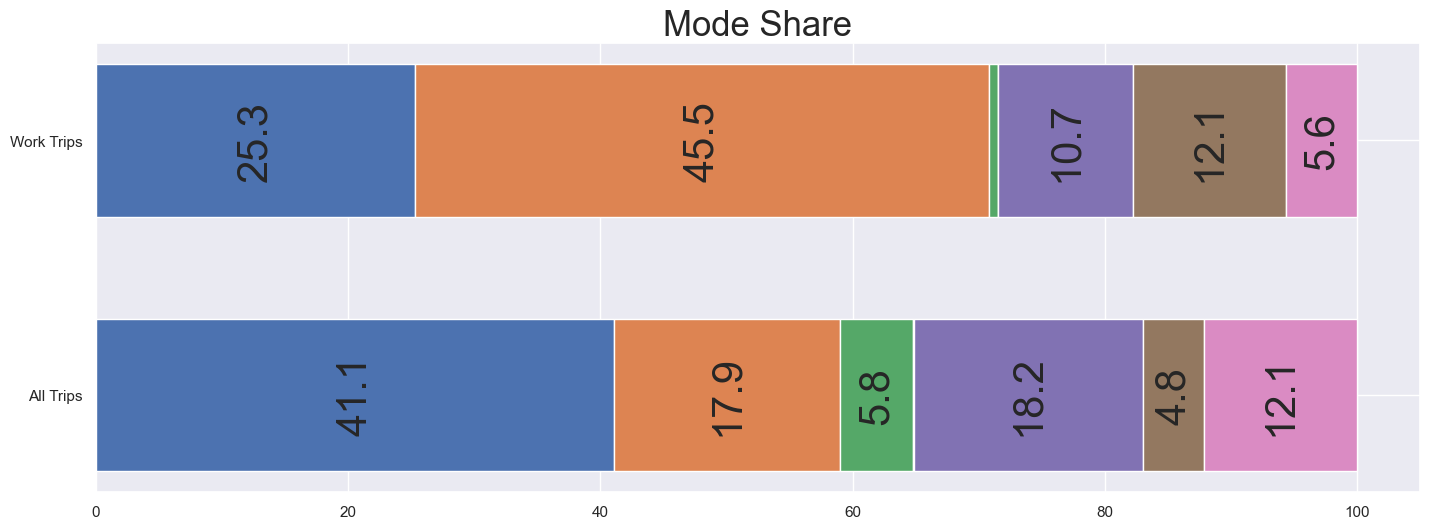

In [73]:
width = 0.6
plt.rcParams.update({'font.size': 30}) 
fig, ax = plt.subplots(1,1, figsize=(15,6))
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Long Term']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for mode in pd.unique(fig_data_mini.Mode):
    mini = fig_data_mini[fig_data_mini['Mode']==mode]
    long = fig_data_long[fig_data_long['Mode']==mode]

    #labels = mini['Trip Type']
    #vals = mini['Proportion']*100
    #vals_str = [round(v,1) if v>1 else '' for v in vals]
    #bar = ax.barh(labels, vals, width, left=running_total_mini, label=mode)
    #ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    #running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    #running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax.barh(labels, vals, width, left=running_total_long, label=mode)
    ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=30)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax.set_title('Minipilot')
ax.set_title('Mode Share', fontsize=25)
ax.xaxis.get_label().set_fontsize(40)
ax.yaxis.get_label().set_fontsize(40)
#ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)
plt.subplots_adjust(bottom=0.25)
fig.tight_layout()
plt.show()
